# Brownian dynamics of Janus swimmer in Chemical source

## One-Particle

In [1]:
import numpy as np
import pandas as pd
from scipy import interpolate
import matplotlib.pyplot as plt
import matplotlib
import matplotlib as mpl
import matplotlib.cm as cm
from scipy.interpolate import LinearNDInterpolator

import sys

import subprocess
import os

import itertools

import my_plot
import time
from numba import jit

#%load_ext cython

### Importing BEM Data

In [2]:
# ## parameters

alpha = 5.0
chi = 0.0
bp = -1.0  
bm = 1.2 

date_directory = "/Users/pmb5727/Projects/Janus_chemical_source/Data_grids/"
file1 = 'V_alpha_' + str(alpha) + '-bp_1.0-bm_0.0-chi_' + str(chi) + '.csv'
file2 = 'V_alpha_' + str(alpha) + '-bp_0.0-bm_1.0-chi_' + str(chi) + '.csv'

df1 = pd.read_csv(date_directory+file1)
df2 = pd.read_csv(date_directory+file2)

#print(df1)
df1=df1[df1['R']>1.02]
#print(df1)
df1=df1.reset_index(drop=True)

df2=df2[df2['R']>1.02]
df2=df2.reset_index(drop=True)


df3 = df2.copy()
df3['vx'] = 0.0
df3['vy'] = 0.0
df3['vz'] = 0.0
df3['omegax'] = 0.0
df3['omegay'] = 0.0
df3['omegaz'] = 0.0


df3['angle'] = df3['angle']*np.pi/180

df3['R'] = df3['R']
df3['vx'] = (bp * df1['vx']  + bm * df2['vx'])/np.pi/6.0
df3['vy'] = (bp * df1['vy']  + bm * df2['vy'])/np.pi/6.0
df3['vz'] = (bp * df1['vz']  + bm * df2['vz'])/np.pi/6.0
df3['omegax'] = (bp * df1['omegax']  + bm * df2['omegax'])/np.pi/6.0
df3['omegay'] = (bp * df1['omegay']  + bm * df2['omegay'])/np.pi/6.0
df3['omegaz'] = (bp * df1['omegaz']  + bm * df2['omegaz'])/np.pi/6.0

# ## reading R_min

x = df3['angle']
y = df3['R']

coords=np.column_stack([x.ravel(),y.ravel()])

df3['R_min'] = 1.03 
df_Rmin=df3[['angle','R_min']]
Rmin= df_Rmin.drop_duplicates(subset = 'angle',keep = 'first')
Rmin.reset_index(drop = True, inplace = True)

print(np.amax(df3['angle']))
print(np.pi/2.)

# ## Interpolation
InterpolatUphi = LinearNDInterpolator(coords, df3['vy'])
InterpolatUR = LinearNDInterpolator(coords, df3['vz'])
Interpolatomegax = LinearNDInterpolator(coords, df3['omegax'])
InterpolatRmin = interpolate.interp1d(Rmin['angle'], Rmin['R_min'])

3.141592653589793
1.5707963267948966


In [3]:
def Full_UR(theta, R):
    if theta > np.pi:
        return InterpolatUR(2.*np.pi - theta, R)
    else:
        return InterpolatUR(theta, R)
    
def Full_UPhi(theta, R):
    if theta > np.pi:
        return -InterpolatUphi(2.*np.pi - theta, R)
    else:
        return InterpolatUphi(theta, R)
    
def Full_OmegaX(theta, R):
    if theta > np.pi:
        return -Interpolatomegax(2.*np.pi - theta, R)
    else:
        return Interpolatomegax(theta, R)

In [4]:
print(Full_UR(0, 10))
print(Full_UR(0, 1.1))



-0.049704523673966626
0.20364266418687413


In [6]:
# myplot = my_plot.MyPlot()
# #fig, ax = plt.subplots(1, 1, figsize=(7,7)) ###myplot.init_plot(title='')
# fig, ax = myplot.init_plot(title='')

# theta = np.linspace(0, 2.*np.pi, 1000)
# R = 9.0

# # ax.plot(theta,
# #         InterpolatUR(theta, R), 
# # #        label=r'$\rho= %.2f, \,\, l_o/R= %.3f$' % (rho, tau),
# #         marker='o',
# #         markersize=5,
# #         linestyle='-',
# #         linewidth=2) 

# # ax.plot(theta,
# #         InterpolatUphi(theta, R), 
# # #        label=r'$\rho= %.2f, \,\, l_o/R= %.3f$' % (rho, tau),
# #         marker='o',
# #         markersize=5,
# #         linestyle='-',
# #         linewidth=2) 

# # ax.plot(theta,
# #         Interpolatomegax(theta, R), 
# # #        label=r'$\rho= %.2f, \,\, l_o/R= %.3f$' % (rho, tau),
# #         marker='o',
# #         markersize=5,
# #         linestyle='-',
# #         linewidth=2) 


# R = [10.0]#, 3.0, 8.0, 9.0]
# for j in R:
#     full_UR = np.asarray([Full_UR(i, j) for i in theta])
#     ax.plot(theta,
#             full_UR, 
#             label=r'$U_R$ $R=%.1f$' % j,
#             marker='None',
#             markersize=5,
#             linestyle='-',
#             linewidth=2)

#     full_phi = np.asarray([Full_UPhi(i, j) for i in theta])
#     ax.plot(theta,
#             full_phi, 
#             label=r'$U_\varphi$ $R=%.1f$' % j,
#             marker='None',
#             markersize=5,
#             linestyle='-',
#             linewidth=2)

# #     full_omegax = np.asarray([Full_OmegaX(i, j) for i in theta])

# #     ax.plot(theta,
# #             full_omegax, 
# #             label=r'$\Omega_x$ $R=%.1f$' % j,
# #             marker='o',
# #             markersize=5,
# #             linestyle='-',
# #             linewidth=2)

# ax.axhline(y=0.0, color='k', linestyle='--')
# ax.axvline(x=np.pi/2., color='k', linestyle='--')
# ax.axvline(x=np.pi/4., color='k', linestyle='--')
# ax.axvline(x=np.pi, color='k', linestyle='--')
# ax.axvline(x=3.*np.pi/4., color='k', linestyle='--')
# ax.axvline(x=5.*np.pi/4., color='k', linestyle='--')
# ax.axvline(x=3.*np.pi/2., color='k', linestyle='--')
# ax.axvline(x=7.*np.pi/4., color='k', linestyle='--')



# #print(InterpolatUR(theta,R))

# myplot.final_plot(fig,
#                   ax,
#                   filename = '', 
#                   x_label = r'$\theta$',
#                   y_label = r'',
#                   x_major = np.pi/2.,
#                   y_major = 0.1,
#                   x_low = None,
#                   x_high = None,
#                   y_low = None,
#                   y_high = None,
#                   x_log = False,
#                   y_log = False,
#                   ncol = 1)    

## Trajectory

In [4]:
# # %%cython --annotate

# # import numpy as np

# # cimport cython
# def single_traj(R0, Phi0, Theta0, RotD, rand_seed, T, dt):
#     RandomConst = np.sqrt(2.0*RotD*dt)

#     ## Number of time steps.
#     N_step = int(T//dt)

#     # Create an empty array to store the realizations.
#     z = np.zeros(N_step)
#     z[:] = np.nan

#     y = np.zeros(N_step)
#     y[:] = np.nan

#     R = np.zeros(N_step)
#     R[:] = np.nan

#     theta = np.zeros(N_step)
#     theta[:] = np.nan

#     theta_image = np.zeros(N_step)
#     # theta_image[:] = np.nan

#     phi = np.zeros(N_step)
#     phi[:] = np.nan

#     phi_image = np.zeros(N_step)
#     phi_image[:] = np.nan

#     R[0] = R0

#     phi[0] = Phi0
#     phi_image[0] = 0

#     theta[0] = Theta0
#     theta_image[0] = 0
#     # print('theta0:', theta[0])

#     UR_time = Full_UR(theta[0], R[0])
#     Uphi_time = Full_UPhi(theta[0], R[0])/R[0]

#     y[0] = R[0]*np.sin(phi[0])
#     z[0] = R[0]*np.cos(phi[0])

#     np.random.seed(rand_seed)
     

#     for i in range(1, N_step):
#         theta_new = theta[i-1]  
    
#         UR_time=Full_UR(theta_new,R[i-1])
        
#         # if (abs(UR_time)<0.0001):
#         #     UR_time = 0.0
        
#         R_new = R[i-1] + UR_time * dt
#         R[i] = R_new        

#         Uphi_time=Full_UPhi(theta_new,R[i - 1])/R[i - 1]
        
#         # if (abs(Uphi_time)<0.0001):
#         #     Uphi_time = 0.0
        
#         phi_new = phi[i-1] + Uphi_time * dt

#         if (phi_new > 2.*np.pi):
#             phi_new -= 2.*np.pi
#             phi_image[i] = phi_image[i-1] + 1
            
#         elif(phi_new < 0.0):
#             phi_new += 2.*np.pi
#             phi_image[i] = phi_image[i-1] - 1
#         else:
#             phi_image[i] = phi_image[i-1]          
#         phi[i] = phi_new        

#         Omega_X = Full_OmegaX(theta_new,R[i - 1])
        
#         # if (abs(Omega_X)<0.0001):
#         #     Omega_X = 0.0

#         theta_new = theta[i-1] + Omega_X * dt + RandomConst * np.random.normal(0, 1)
        
#         # print(theta_new)
        
#         if (theta_new > 2.*np.pi):
            
#             while theta_new > 2.*np.pi:
#                 theta_new -= 2.*np.pi
#                 theta_image[i] += 1
                
#             theta_image[i] =  theta_image[i-1] + 1
            
#         elif(theta_new < 0.0):
#             while theta_new < 0.0:
#                 theta_new += 2.*np.pi
#                 theta_image[i] -= 1
            
#             theta_image[i] = theta_image[i-1] - 1
            
#         else:
#             # theta_image[i] = 0   
#             theta_image[i] = theta_image[i-1]  

# #         if (theta_new > 2.*np.pi):
# #             theta_new -= 2.*np.pi
# #             theta_image[i] =  theta_image[i-1] + 1
            
# #         elif(theta_new < 0.0):
# #             theta_new += 2.*np.pi
# #             theta_image[i] = theta_image[i-1] - 1
            
# #         else:
# #             # theta_image[i] = 0   
# #             theta_image[i] = theta_image[i-1]   
            
    
#         theta[i] = theta_new
        
#         if (theta[i] > 2.*np.pi):
#             print('----- theta > 2pi')
        
#         # print('------', theta[i],'--------',theta_new,'----', theta_image[i])
        
#         if np.isnan(theta[i]):
#             print(i, theta[i], '---------------- a NAN value')



#         y[i] = R[i] * np.sin(phi[i])
#         z[i] = R[i] * np.cos(phi[i])
                
#         if((R[i] < 1.03) | (R[i] > 10.0)):
#             break
          
#         # if((R[i] < 1.03)):
#         #     break
        
#     # print(theta_image[5000])
#     # print(theta_image.shape)
            
#     number_iteration = i
#     # print(i, N_step)

#     return np.asarray([theta, theta_image, z, y])

In [5]:
def single_traj(R0, Phi0, Theta0, RotD, rand_seed, T, dt):
    RandomConst = np.sqrt(2.0*RotD*dt)

    ## Number of time steps.
    N_step = int(T//dt)

    # Create an empty array to store the realizations.
    z = np.zeros(N_step)
    z[:] = np.nan

    y = np.zeros(N_step)
    y[:] = np.nan

    R = np.zeros(N_step)
    R[:] = np.nan

    theta = np.zeros(N_step)
    theta[:] = np.nan

    theta_image = np.zeros(N_step)
    # theta_image[:] = np.nan

    phi = np.zeros(N_step)
    phi[:] = np.nan

    phi_image = np.zeros(N_step)
    phi_image[:] = np.nan

    R[0] = R0

    phi[0] = Phi0
    phi_image[0] = 0

    theta[0] = Theta0
    theta_image[0] = 0
    # print('theta0:', theta[0])

    UR_time = Full_UR(theta[0], R[0])
    Uphi_time = Full_UPhi(theta[0], R[0])/R[0]

    y[0] = R[0]*np.sin(phi[0])
    z[0] = R[0]*np.cos(phi[0])

    np.random.seed(rand_seed)
     

    for i in range(1, N_step):
        theta_new = theta[i-1]  
        
        
        if(R[i-1] < 1.03):
            UR_time = 0.0
            Uphi_time=Full_UPhi(theta_new,1.03)/R[i - 1]
            Omega_X = Full_OmegaX(theta_new,1.03)
            
        elif(R[i-1] > 10.0):
            UR_time = Full_UR(theta_new,10.0)
            Uphi_time=Full_UPhi(theta_new,10.0)/R[i - 1]
            Omega_X = Full_OmegaX(theta_new,10.0)
            
        else:
            UR_time=Full_UR(theta_new,R[i-1])
            Uphi_time=Full_UPhi(theta_new,R[i - 1])/R[i - 1]
            Omega_X = Full_OmegaX(theta_new,R[i - 1])
        
        # if (abs(UR_time)<0.0001):
        #     UR_time = 0.0
        
        R_new = R[i-1] + UR_time * dt
        R[i] = R_new        

        # Uphi_time=Full_UPhi(theta_new,R[i - 1])/R[i - 1]
        
        # if (abs(Uphi_time)<0.0001):
        #     Uphi_time = 0.0
        
        phi_new = phi[i-1] + Uphi_time * dt

        if (phi_new > 2.*np.pi):
            phi_new -= 2.*np.pi
            phi_image[i] = phi_image[i-1] + 1
            
        elif(phi_new < 0.0):
            phi_new += 2.*np.pi
            phi_image[i] = phi_image[i-1] - 1
        else:
            phi_image[i] = phi_image[i-1]          
        phi[i] = phi_new        

        # Omega_X = Full_OmegaX(theta_new,R[i - 1])
        
        # if (abs(Omega_X)<0.0001):
        #     Omega_X = 0.0

        theta_new = theta[i-1] + Omega_X * dt + RandomConst * np.random.normal(0, 1)
        
        # print(theta_new)
        
        if (theta_new > 2.*np.pi):
            
            while theta_new > 2.*np.pi:
                theta_new -= 2.*np.pi
                theta_image[i] += 1
                
            theta_image[i] =  theta_image[i-1] + 1
            
        elif(theta_new < 0.0):
            while theta_new < 0.0:
                theta_new += 2.*np.pi
                theta_image[i] -= 1
            
            theta_image[i] = theta_image[i-1] - 1
            
        else:
 
            theta_image[i] = theta_image[i-1]  

        theta[i] = theta_new
        
        if (theta[i] > 2.*np.pi):
            print('----- theta > 2pi')
        
        # print('------', theta[i],'--------',theta_new,'----', theta_image[i])
        
        if np.isnan(theta[i]):
            print(i, theta[i], '---------------- a NAN value')



        y[i] = R[i] * np.sin(phi[i])
        z[i] = R[i] * np.cos(phi[i])     
        
        
            

                
        # if((R[i] < 1.03) | (R[i] > 10.0)):
        #     break
 
    number_iteration = i
    # print(i, N_step)

    return np.asarray([theta, theta_image, z, y])

In [11]:
start_time = time.time()

N_traj = 1000

R0 = 5.0
Phi0 = 0.0 #np.pi
# Theta0 = np.linspace(0, 2.*np.pi, N_traj)
Theta0 = 2*np.pi/3 

RotD = 0.01
rand_seed = 1
T = 1600
dt = 0.2

all_data = []

for i in np.arange(N_traj):
    rand_seed = i
    all_data.append(single_traj(R0, Phi0, Theta0, RotD, rand_seed, T, dt))
    
end_time = time.time()
print("Elapsed time = %s" % (end_time - start_time))  

Elapsed time = 491.9400210380554


In [13]:
all_array = np.asarray(all_data)
#print(all_array.shape)

# print(all_array.shape)
# print(all_array[0][1])
masked_all_array = np.ma.masked_invalid(all_array)


z = masked_all_array[:,2,:]
y = masked_all_array[:,3,:]

thetaT = all_array[:,0,:]
theta_im = all_array[:,1,:]


# print(z.count(axis = 0))
#count_z = z[~np.isnan(masked_all_array[:,2,:])

R_time = np.sqrt(z**2+y**2)

z_avg = np.sum(z, axis = 0)/z.count(axis = 0)
y_avg = np.sum(y, axis = 0)/y.count(axis = 0)

R2_avg = z_avg**2 + y_avg**2
R_avgR0 = 2*(z_avg*R0*np.cos(Phi0) - y_avg*R0*np.sin(Phi0))

R_time = np.sqrt(z**2 + y**2)

DeltaR2 = (z - R0*np.cos(Phi0))**2 + (y + R0*np.sin(Phi0))**2


z_avg = np.average(z, axis = 0)
y_avg = np.average(y, axis = 0)


In [14]:
print(np.any(np.isnan(all_array[:,0,:])))
print(all_array.shape)

False
(1000, 4, 7999)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


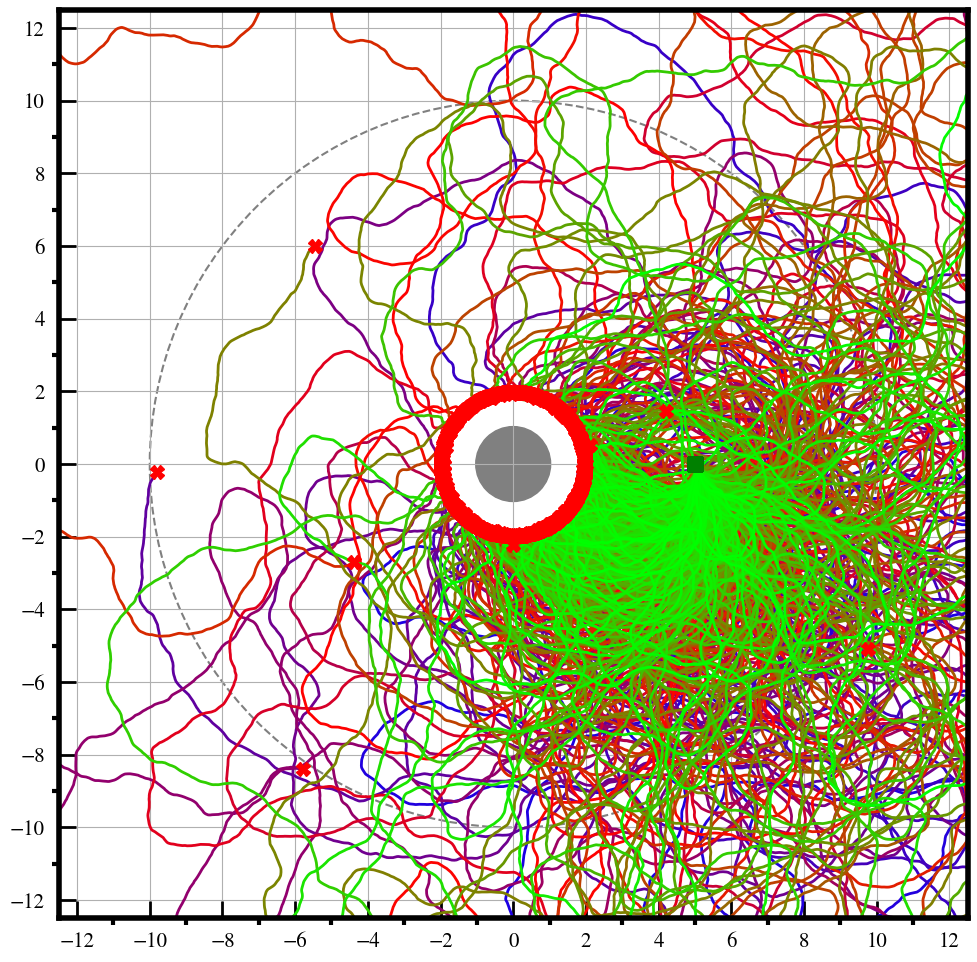

In [42]:
myplot = my_plot.MyPlot()
fig, ax = myplot.init_plot(title='')

marker = itertools.cycle(('o', 'v', 's', '^', 'P', 'D')) 
ax.set_prop_cycle('color', plt.cm.brg(np.linspace(0.05,1.0, len(all_data))))

plt.tick_params(axis = 'both', direction = "in", pad = 10.0, length = 12.0, width = 2.0)

ax.set_aspect(1)
for single_data in all_data:
    z_traj = single_data[2]
    y_traj = single_data[3]

    ax.plot(z_traj,
            y_traj, 
#        label=r'$\rho= %.2f, \,\, l_o/R= %.3f$' % (rho, tau),
            marker='None',
            markersize=1,
            linestyle='-',
            linewidth=2) 
    
for single_data in all_data:
    z_traj = single_data[2]
    y_traj = single_data[3]
    
    ax.plot(z_traj[~np.isnan(z_traj)][0],
            y_traj[~np.isnan(z_traj)][0], 
#        label=r'$\rho= %.2f, \,\, l_o/R= %.3f$' % (rho, tau),
            marker='s',
            color='g',
            markersize=10,
            linestyle='-',
            linewidth=2) 

    ax.plot(z_traj[~np.isnan(z_traj)][-1],
            y_traj[~np.isnan(z_traj)][-1], 
#        label=r'$\rho= %.2f, \,\, l_o/R= %.3f$' % (rho, tau),
            marker='X',
            color='r',
            markersize=10,
            linestyle='-',
            linewidth=2)  
    
# ax.plot(z_avg,
#         y_avg, 
# #        label=r'$\rho= %.2f, \,\, l_o/R= %.3f$' % (rho, tau),
#         marker='None',
#         color='k',
#         markersize=10,
#         linestyle='--',
#         linewidth=2)       

draw_disk = plt.Circle((0, 0), 1.03, color='gray')
ax.add_artist(draw_disk)

draw_circle = plt.Circle((0, 0), 10,fill=False, color='gray', ls='--',linewidth=1.5)
ax.add_artist(draw_circle)


draw_circle = plt.Circle((0, 0), 1.97625249,fill=False, color='black', ls='-',linewidth=1.5)
ax.add_artist(draw_circle)

###plotting arrows
# n_arrow = number_iteration//4
# zz = z[1:number_iteration:n_arrow]
# yy = y[1:number_iteration:n_arrow]
# uu = u_z[1:number_iteration:n_arrow]
# vv = u_y[1:number_iteration:n_arrow]
# ax.quiver(zz, yy, uu/np.sqrt(uu**2 + vv**2), vv/np.sqrt(uu**2 + vv**2), color='Black',headwidth=8)


ax.set_xlim(-12.5,12.5)
ax.set_ylim(-12.5,12.5)
#ticks = [-10,-8,-6,-4,-2,0,2,4,6,8,10]
#plt.xticks(ticks,ticks)
#plt.yticks(ticks,ticks)

ax.grid(True)
plt.tight_layout()

myplot.final_plot(fig,
                  ax,
                  filename = '', 
                  x_label = r'',
                  y_label = r'',
                  x_major = 2.0,
                  y_major = 2.0,
                  x_low = -12.5,
                  x_high = 12.5,
                  y_low = -12.5,
                  y_high = 12.5,
                  x_log = False,
                  y_log = False,
                  ncol = 1) 

In [10]:
z[~np.isnan(z)]

masked_array(data=[5.0, 5.002192039694548, 5.00467970705978, ...,
                   -0.02037444573720734, -0.019517614766439963,
                   -0.018916810221126318],
             mask=[False, False, False, ..., False, False, False],
       fill_value=1e+20)

In [36]:
N_traj

1000

In [24]:
i =500
z[i,last_time_traj[i]-1]

-0.2457436421324614

In [57]:
last_time_traj = (~np.isnan(z)).sum(1)
# print(last_time_traj.shape)

crashing = []
crashing_count = 0

trap = []
trap_count = 0

middle_count = 0

escaping = []
escaping_count = 0

for i in range(0,N_traj):
    R_final = np.sqrt(z[i,last_time_traj[i]-1]**2+y[i,last_time_traj[i]-1]**2)    
    # print(i, np.round(R_final,2))
    
    if (np.round(R_final,2)>=1.80) and (np.round(R_final,2)<=2.0):
        # print(i)
        trap.append(i)
        trap_count += 1
    
    if R_final<=1.03:
        crashing.append(i)
        crashing_count += 1
        
    if np.round(R_final,2)>10.0:
        # print(i)
        escaping.append(i)
        escaping_count += 1
    
    if (np.round(R_final,2)>2.0) and (np.round(R_final,2)<=10.0):
        # trap.append(i)
        # print(i)
        middle_count += 1

print("Trapping_count" , trap_count)
print("Crashing_count" , crashing_count)
print("middle_count" , middle_count)
print("Escaping_count" , escaping_count,"   ", crashing_count + escaping_count)
print("Sum" , crashing_count + escaping_count + trap_count + middle_count)


# print(np.sqrt(z[1,last_time_traj[1]-1]**2+y[1,last_time_traj[1]-1]**2))
# print(np.sqrt(z[100,last_time_traj[100]-1]**2+y[100,last_time_traj[1]-1]**2))
# last_time_traj[50]

Trapping_count 971
Crashing_count 0
middle_count 6
Escaping_count 23     23
Sum 1000


## MSD

In [88]:
all_array = np.asarray(all_data)

masked_all_array = np.ma.masked_invalid(all_array)

# new_array = np.ma.filled(masked_all_array,0)

thetaT = all_array[:,0,:]
theta_im = all_array[:,1,:]

# print(thetaT)
z = all_array[:,2,:]
y = all_array[:,3,:]

# print(z.count(axis = 0))

# z_avg = np.sum(z, axis = 0)/z.count(axis = 0)
# y_avg = np.sum(y, axis = 0)/y.count(axis = 0)


R_time = np.sqrt(z**2 + y**2)


DeltaR2 = (z - R0*np.cos(Phi0))**2 + (y + R0*np.sin(Phi0))**2
# masked_all_array

In [58]:
z.shape

(1000, 7999)

In [60]:
T/dt

8000.0

In [89]:
import numpy as np
import pandas as pd
from scipy import interpolate
import matplotlib.pyplot as plt
import matplotlib



Num = thetaT.shape[1]
Num_ensemble = thetaT.shape[0]
print(Num)

DeltaTheta2 =  np.zeros(Num)
DeltaTheta =  np.zeros(Num)
Deltaz =  np.zeros(Num)
Deltay =  np.zeros(Num)
z_mean =  np.zeros(Num)
y_mean =  np.zeros(Num)

phi_mean =  np.zeros(Num)


DeltaR =  np.zeros(Num)
R_mean =  np.zeros(Num)
DeltaR2 =  np.zeros(Num)

count = np.zeros_like(DeltaTheta2)
count_R = np.zeros_like(DeltaR)
Ti = np.arange(0, Num, 1)* dt

print(thetaT.shape)

theta_unwrapped = thetaT + 2.*np.pi*theta_im

# print(theta_unwrapped)
# print()
# print(theta_im)

for i in np.arange(0,Num):
    for j in np.arange(0, Num_ensemble):    
        # print(theta_unwrapped[i,j])
        if (np.isnan(theta_unwrapped[j,i])): 
            # print(i, Deltaz[i], '--- NAN')
            pass
        else:
            
            DeltaTheta2[i] += (theta_unwrapped[j,i]-theta_unwrapped[j,0])**2.
            DeltaTheta[i] += (theta_unwrapped[j,i])
            Deltaz[i] += z[j,i]-z[j,0]
            Deltay[i] += y[j,i]-y[j,0]
            
            z_mean[i] += z[j,i]
            y_mean[i] += y[j,i]
            
            phi_mean[i] += np.arctan(y[j,i]/z[j,i])
                        
            DeltaR[i] += np.sqrt((z[j,i]-z[j,0])**2+(y[j,i]-y[j,0])**2)
            R_mean[i] += np.sqrt(z[j,i]**2+y[j,i]**2)
            DeltaR2[i] += ((z[j,i]-z[j,0])**2+(y[j,i]-y[j,0])**2)

            count[i] += 1
            count_R[i] += 1     
    

        # print(DeltaTheta2[i],"  ", count[j-i])

7999
(1000, 7999)


In [12]:

print(Deltaz/count_R)
# print(type(Deltaz))
print(np.any(np.isnan(Deltaz)))
print(np.any(np.isnan(Deltay)))
print(np.any(all_array[:,0,:]))
print(np.any(np.isnan(thetaT)))
print()
print(thetaT[~np.isnan(thetaT)].max())
print(theta_unwrapped[~np.isnan(theta_unwrapped)].max())
# print(np.where(theta_unwrapped==theta_unwrapped[~np.isnan(theta_unwrapped)].max()))

# print(theta_unwrapped.shape)
# print()
# print(theta_unwrapped[109,5800:5815])
# print(thetaT[109,5800:5815])
# print(theta_im[109,5800:5815])

NameError: name 'Deltaz' is not defined

(1000,)
(459,)


<Figure size 640x480 with 0 Axes>

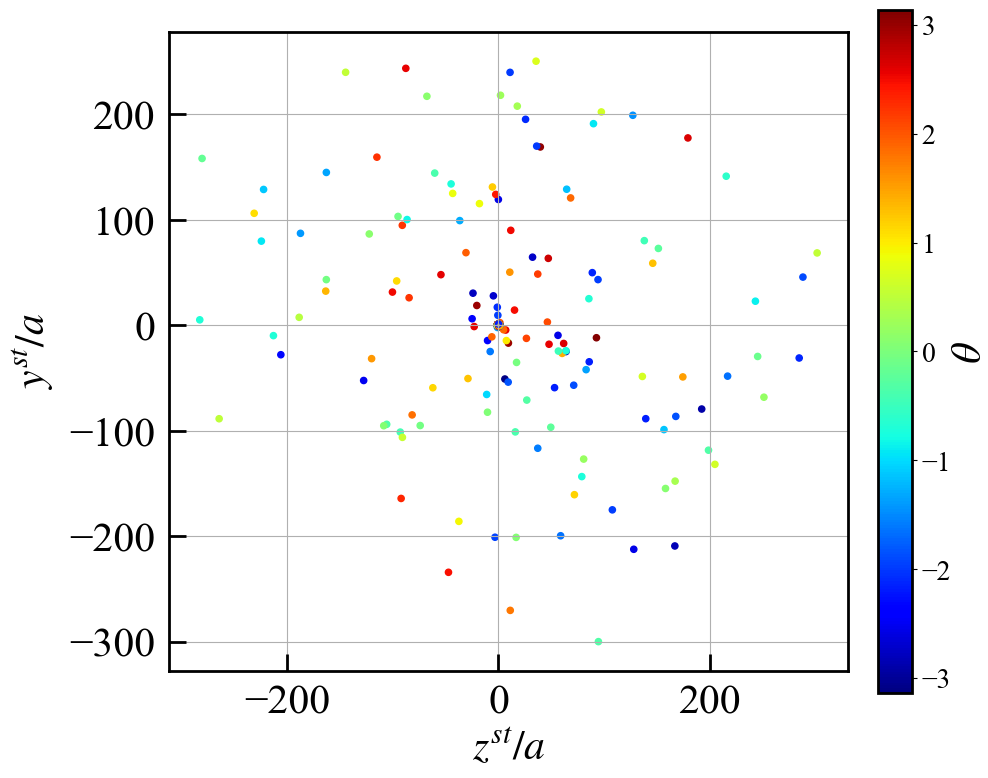

In [93]:
# myplot = my_plot.MyPlot()
# fig, ax = myplot.init_plot(title='')

# marker = itertools.cycle(('o', 'v', 's', '^', 'P', 'D')) 
# ax.set_prop_cycle('color', plt.cm.brg(np.linspace(0.05,1.0, y.shape[0])))
# plt.rcParams.update({'font.size': 50})
plt.figure(1)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()        

mpl.rcParams['font.family'] = 'Times New Roman' 
plt.rcParams['font.size'] = 30
plt.rcParams['axes.linewidth'] = 2
plt.tick_params(axis = 'both', which='both', direction = "in", pad = 10.0, length = 12.0, width = 2.0)

ax.set_aspect(1)


y_final = y[:,-1]
z_final = z[:,-1]
theta_final = thetaT[:,-1]

y_final = y_final[~np.isnan(y_final)]
z_final = z_final[~np.isnan(z_final)]
theta_final = theta_final[~np.isnan(theta_final)]

index_pi = np.where(theta_final > np.pi)[0]

print(theta_final.shape)
print(index_pi.shape)
# print(theta_final[index_pi])


theta_final[index_pi] -= 2*np.pi
# print(theta_final[index_pi])

# print(theta_final[index_pi].min())
# print(theta_final[index_pi].max())

# print()

# print(theta_final.min())
# print(theta_final.max())


# sc = ax.scatter(z_final,y_final,c = theta_final,cmap="jet",vmin=-1.0,vmax=1.0, s=20)

sc = ax.scatter(z_final,y_final,c = theta_final,cmap="jet", s=20)



cbar = plt.colorbar(sc, fraction=0.046, pad=0.04)

# cbar.ax.set_yticklabels(['-1','-0.5', '0', '0.5' ,'1'])
cbar.set_label(r'$\theta$', rotation=270, fontsize=30, labelpad=20.0)
cbar.ax.tick_params(labelsize=20)


# ax.set_xlim(-12.5,12.5)
# ax.set_ylim(-12.5,12.5)

draw_disk = plt.Circle((0, 0), 1.0, color='gray')
ax.add_artist(draw_disk)


ax.grid(True)
plt.tight_layout()

ax.set_xlabel(r'$z^{st}/a$', fontsize=30)
ax.set_ylabel(r'$y^{st}/a$', rotation=90, fontsize=30, labelpad=10.0)

theta_inti = np.round(Theta0*180/(np.pi))

file = '_bp_' + str(bp) + '_bm_'+ str(bm) + '_chi_'+ str(chi) + '_alpha_' + str(alpha) +'_Dr_' + str(RotD) + '_R0_' + str(R0) + '_theta0_' + str(theta_inti)+ '.png'

filename = 'BD_plots/BD_fixedpoint' + file

# fig.savefig(filename, dpi=300, bbox_inches='tight', transparent=False)

In [95]:
# trajnum= 60
# print(theta_unwrapped[trajnum])
# print(R_time[trajnum,9990:9999])

print(DeltaTheta.shape)
print(DeltaTheta/count)
print()
print(Deltay/count_R)
print(Deltaz/count_R)

print()
print(np.sqrt((Deltaz**2+Deltay**2))/count_R)

print(R_mean/count_R)

# print(DeltaR.shape)

(7999,)
[2.0943951  2.09381064 2.09390588 ... 2.1605316  2.16248381 2.16078427]

[0.         0.042964   0.08569191 ... 0.79964858 0.79891531 0.79812936]
[ 0.         -0.02351474 -0.04733279 ... -3.11718728 -3.11712997
 -3.11704913]

[0.         0.04897804 0.09789533 ... 3.2181197  3.21788206 3.2176087 ]
[ 5.          4.97667072  4.95340861 ... 21.02055212 21.02119069
 21.02183402]


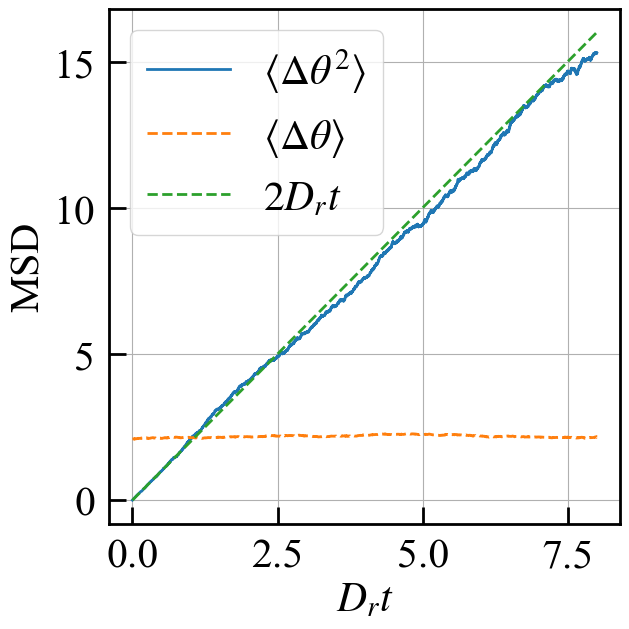

In [103]:
import matplotlib.pyplot as plt
from pylab import plot, show, grid, xlabel, ylabel
# myplot = my_plot.MyPlot()
fig, ax = plt.subplots(1, 1, figsize=(7,7)) ###myplot.init_plot(title='')

plt.tick_params(axis = 'both', direction = "in", pad = 10.0, length = 12.0, width = 2.0)

ax.plot(Ti*RotD,DeltaTheta2/count, 
#        label=r'$\rho= %.2f, \,\, l_o/R= %.3f$' % (rho, tau),
        marker='None',
        markersize=5,
        linestyle='-',
        linewidth=2, label=r'$\leftangle\Delta \theta^2\rightangle$') 

ax.plot(Ti*RotD,DeltaTheta/count, 
#        label=r'$\rho= %.2f, \,\, l_o/R= %.3f$' % (rho, tau),
        marker='None',
        markersize=5,
        linestyle='--',
        linewidth=2, label=r'$\leftangle\Delta \theta\rightangle$') 

ax.plot(Ti*RotD,
        2*Ti*RotD, 
#        label=r'$\rho= %.2f, \,\, l_o/R= %.3f$' % (rho, tau),
        marker='None',
        markersize=5,
        linestyle='--',
        linewidth=2, label=r'$2 D_r t$') 

# ax.set_xlim(-1,8)
# ax.set_ylim(-0.1,5)

xlabel(r'$D_r t$', fontsize=30)
ylabel(r'MSD', fontsize=30)

ax.legend(loc='upper left')


grid(True)
plt.tight_layout()

theta_inti = np.round(Theta0*180/(np.pi))

file = '_bp_' + str(bp) + '_bm_'+ str(bm) + '_chi_'+ str(chi) + '_alpha_' + str(alpha) +'_Dr_' + str(RotD) + '_R0_' + str(R0) + '_theta0_' + str(theta_inti)+ '.png'

filename = 'BD_plots/BD_theta' + file

fig.savefig(filename, dpi=300, bbox_inches='tight', transparent=False)


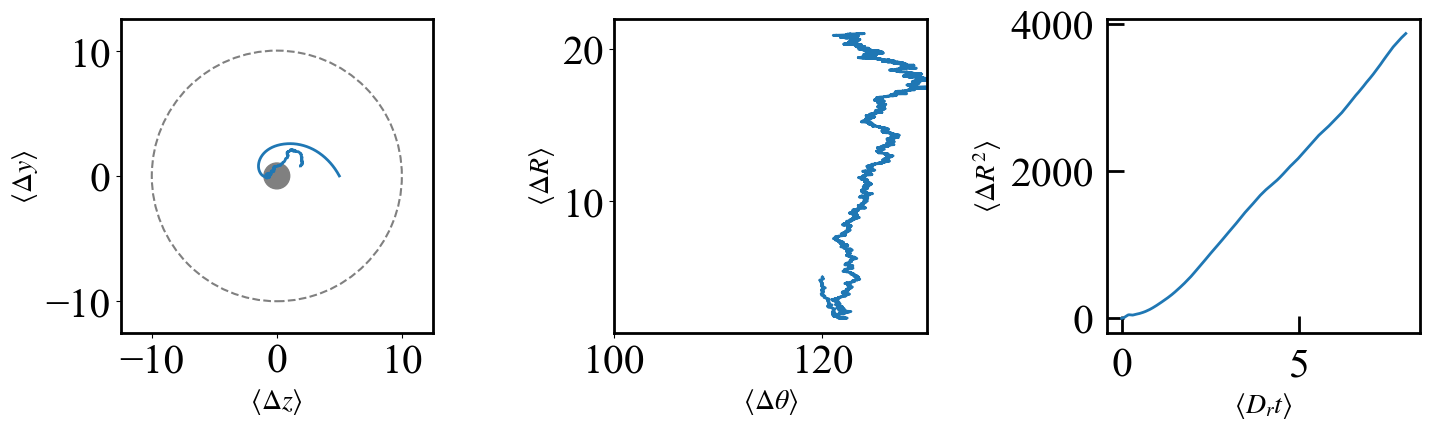

In [111]:
import matplotlib.pyplot as plt
from pylab import plot, show, grid, xlabel, ylabel
# myplot = my_plot.MyPlot()
fig, ax = plt.subplots(1, 3, figsize=(15,5)) ###myplot.init_plot(title='')

plt.tick_params(axis = 'both', direction = "in", pad = 10.0, length = 12.0, width = 2.0)


ax[0].plot(z_mean/count_R,
        y_mean/count_R, 
#        label=r'$\rho= %.2f, \,\, l_o/R= %.3f$' % (rho, tau),
        marker='None',
        markersize=5,
        linestyle='-',
        linewidth=2) 

ax[1].plot(DeltaTheta*180/(count*np.pi),
        R_mean/count_R, 
#        label=r'$\rho= %.2f, \,\, l_o/R= %.3f$' % (rho, tau),
        marker='None',
        markersize=5,
        linestyle='-',
        linewidth=2)

ax[2].plot(RotD*Ti,DeltaR2/count_R,
#        label=r'$\rho= %.2f, \,\, l_o/R= %.3f$' % (rho, tau),
        marker='None',
        markersize=5,
        linestyle='-',
        linewidth=2)


draw_disk = plt.Circle((0, 0), 1.03, color='gray')
ax[0].add_artist(draw_disk)

draw_circle = plt.Circle((0, 0), 10,fill=False, color='gray', ls='--',linewidth=1.5)
ax[0].add_artist(draw_circle)

ax[0].set_xlim(-12.5,12.5)
ax[0].set_ylim(-12.5,12.5)

ax[1].set_xlim(100,130)
# ax[1].set_ylim(0.8,15.0)

ax[0].set_ylabel(r'$\leftangle\Delta y\rightangle$', fontsize=20)
ax[0].set_xlabel(r'$\leftangle\Delta z\rightangle$', fontsize=20)

ax[1].set_ylabel(r'$\leftangle\Delta R\rightangle$', fontsize=20)
ax[1].set_xlabel(r'$\leftangle\Delta \theta\rightangle$', fontsize=20)

ax[2].set_ylabel(r'$\leftangle\Delta R^2\rightangle$', fontsize=20)
ax[2].set_xlabel(r'$\leftangle D_r t\rightangle$', fontsize=20)

# grid(True)
plt.tight_layout()

theta_inti = np.round(Theta0*180/(np.pi))

file = '_bp_' + str(bp) + '_bm_'+ str(bm) + '_chi_'+ str(chi) + '_alpha_' + str(alpha) +'_Dr_' + str(RotD) + '_R0_' + str(R0) + '_theta0_' + str(theta_inti)+ '.png'


filename = 'BD_plots/BD_R' + file

# fig.savefig(filename, dpi=300, bbox_inches='tight', transparent=False)

In [127]:
print(z_mean/count_R)
print(y_mean/count_R)

print(np.sqrt(y_mean**2+z_mean**2)/count_R)

mask_R = np.sqrt(y_mean**2+z_mean**2)/count_R < 1.03

print(np.sqrt(y_mean[mask_R]**2+z_mean[mask_R]**2)/count_R[mask_R])

print(y_mean[mask_R]/count_R[mask_R],z_mean[mask_R]/count_R[mask_R])

[5.         4.97648526 4.95266721 ... 1.88281272 1.88287003 1.88295087]
[0.         0.042964   0.08569191 ... 0.79964858 0.79891531 0.79812936]
[5.         4.97667072 4.95340849 ... 2.04558588 2.0453521  2.04511967]
[1.02880293 1.01495081 1.0011585  ... 1.02811175 1.02902419 1.02995456]
[-0.03753467 -0.04413018 -0.05035108 ...  0.96094244  0.96120174
  0.96147231] [-1.028118   -1.01399097 -0.99989155 ...  0.365518    0.36739896
  0.36929311]


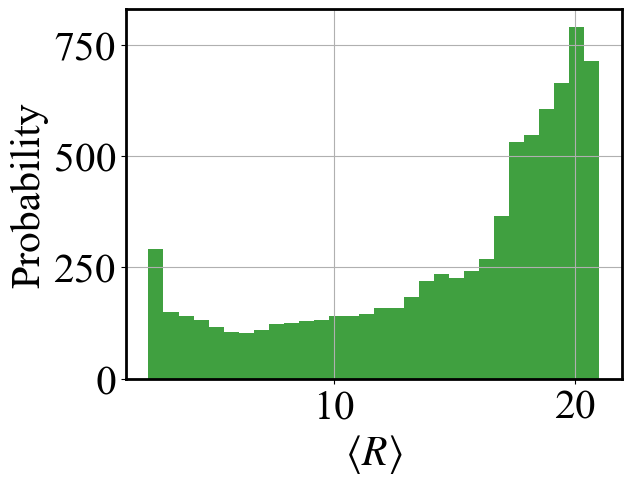

In [109]:
n, bins, patches = plt.hist(R_mean/count_R, 30, density=False, facecolor='g', alpha=0.75)


plt.xlabel(r'$\leftangle R \rightangle$')
plt.ylabel('Probability')
# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.xlim(0, 10)
# plt.ylim(0, 30)
plt.grid(True)
plt.show()

# plt.hist(R_mean/count_R, bins = 50)

In [ ]:
R_time = 

n, bins, patches = plt.hist(R_mean/count_R, 30, density=False, facecolor='g', alpha=0.75)


plt.xlabel(r'$\leftangle R \rightangle$')
plt.ylabel('Probability')
# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.xlim(0, 10)
# plt.ylim(0, 30)
plt.grid(True)
plt.show()

# plt.hist(R_mean/count_R, bins = 50)